In [1]:
#personal finance planner

In [2]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import mc_simulation
from MCForecastTools import MCSimulation
%matplotlib inline
import seaborn as sns
import json

In [3]:
#loading our .env variable
load_dotenv()

True

In [4]:
#current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [5]:
#crypto api url's
btc_api="https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

In [6]:
eth_api="https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
#fetching current eth price
eth_request=requests.get(eth_api)

In [8]:

eth_price=eth_request.json()

In [9]:
eth_data=json.dumps(eth_price,indent=4)

In [10]:
print(eth_data)
eth_load=json.loads(eth_data)
Eth_CAD=eth_load['data']['1027']['quotes']['CAD']['price']

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114228686,
            "total_supply": 114228686,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1043.24,
                    "volume_24h": 36830034345,
                    "market_cap": 118753923192,
                    "percentage_change_1h": 2.09031331499243,
                    "percentage_change_24h": -1.25538577524969,
                    "percentage_change_7d": -5.44835041740082,
                    "percent_change_1h": 2.09031331499243,
                    "percent_change_24h": -1.25538577524969,
                    "percent_change_7d": -5.44835041740082
                },
                "CAD": {
                    "price": 1325.749392,
                    "volume_24h": 46803607645.626,
                  

In [13]:
#fetchng btc price
btc_request=requests.get(btc_api)
btc_content=btc_request.content
btc_price=btc_request.json()
btc_data=json.dumps(btc_price,indent=4)

btc_load=json.loads(btc_data)

btc_CAD=btc_load['data']['1']['quotes']['CAD']['price']
btc_load

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18598775,
   'total_supply': 18598775,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 33431.0,
     'volume_24h': 67430730759,
     'market_cap': 619643204041,
     'percentage_change_1h': 1.22471979475424,
     'percentage_change_24h': -1.45760801628995,
     'percentage_change_7d': -1.91088541137448,
     'percent_change_1h': 1.22471979475424,
     'percent_change_24h': -1.45760801628995,
     'percent_change_7d': -1.91088541137448},
    'CAD': {'price': 42484.1148,
     'volume_24h': 85690972648.5372,
     'market_cap': 787442583695.302,
     'percent_change_1h': 1.22471979475424,
     'percent_change_24h': -1.45760801628995,
     'percent_change_7d': -1.91088541137448}},
   'last_updated': 1610504547}},
 'metadata': {'timestamp': 1610504547,
  'num_cryptocurrencies': 1386,
  'error': None}}

In [14]:
#showing current value of my crypto
my_btc_value=my_btc*btc_CAD
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
my_eth_value=my_eth*Eth_CAD
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
total_crypto=my_btc_value+my_eth_value

The current value of your 1.2 BTC is $50980.94
The current value of your 5.3 ETH is $7026.47


In [224]:
load_dotenv()


True

In [28]:
#declaring my api_key and secret key
key=os.getenv('api_key')
secret=os.getenv('secret_key')

In [29]:
print(key,secret)

PK6LSEON7GI2M843HE7X SIM7FLtE3DzMzZtKxHRJYZjL7SrZRE9iXEGrYT7V


In [30]:
#calling the api
alpapi = tradeapi.REST(
    key,
    secret,
    api_version="v2")

In [31]:
today = pd.Timestamp("2021-01-05", tz="America/New_York").isoformat()

In [32]:
tickers = ["AGG", "SPY"]

In [33]:
timeframe = "1D"

In [34]:
df_portfolio = alpapi.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2021-01-05 00:00:00-05:00  118.06  118.06  117.75  117.915  5915389  368.1   

                                                            
                            high     low   close    volume  
time                                                        
2021-01-05 00:00:00-05:00  372.5  368.05  371.32  53668865

In [35]:
#declaring both agg and spy closing prices

agg_close=df_portfolio['AGG']['close'][0]
spy_close=df_portfolio['SPY']['close'][0]

In [36]:
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $117.915
Current SPY closing price: $371.32


In [37]:
#current share holdings
my_agg_shares=200
my_spy_shares=50

In [38]:
#value of my shares
agg_value=agg_close*my_agg_shares
spy_value=spy_close*my_spy_shares

In [39]:
total_share_value=agg_value+spy_value
print(f"The current value of your {my_spy_shares} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg_shares} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $18566.00
The current value of your 200 AGG shares is $23583.00


In [40]:
#savings health analysis

In [41]:
#declaring my monthly income: good to have idea for my emergency funds will be
monthly_income=12000
data = {'Amount':[total_crypto, total_share_value]}

In [42]:
data

{'Amount': [58007.409537600004, 42149.0]}

In [43]:
#creating a datframe for our savings
df_savings=pd.DataFrame(data,index=['crypto','shares'])

In [45]:
df_savings

,Amount
crypto,58007.409538
shares,42149.000000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

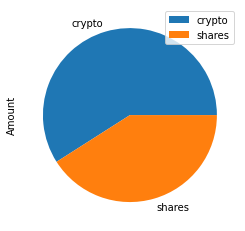

In [242]:

df_savings.plot.pie(subplots=True)

In [272]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings=total_crypto+total_share_value#we can also declare df_savings.sum(), i chose to go this route
print(emergency_fund,total_savings)


36000 102868.1542255


In [273]:
#simple algorithmic return to tell our clients how well their present savings health is
if total_savings>emergency_fund:
    print('hello! Congratulations, your savings are on Steroids')
elif total_savings==emergency_fund:
    print('great achievemts!')
elif total_savings<emergency_fund:
    short_on=emergency_fund-total_savings
    print('you could do more, here is how much MORE',short_on)

hello! Congratulations, your savings are on Steroids


In [276]:

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [277]:
df_port = alpapi.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_port.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [288]:
# Configuring a Monte Carlo simulation to forecast thirty years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_port,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [293]:
#we view our portfolio for the next 30yrs
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [299]:
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004316,1.009136,0.999026,1.010772,1.004376,1.000500,0.998851,1.001570,0.991601,1.011335,...,1.016586,0.990390,1.006861,1.007805,0.991568,0.996148,1.004142,0.992826,0.997780,0.993519
2,1.017679,1.014034,1.000692,1.004454,0.997076,1.008411,0.994069,1.007819,1.008312,1.012620,...,1.020026,0.998018,0.999252,1.013166,0.988399,1.000715,0.998262,0.992322,1.008726,1.001385
3,1.019414,1.011944,1.011096,1.007436,1.003061,1.008403,0.982743,1.003733,1.018248,1.016158,...,1.022930,0.992183,1.005153,1.026925,0.996206,1.002588,0.989362,1.001911,0.999647,1.012030
4,1.028406,1.012011,1.008242,1.015114,0.999254,1.012290,0.969483,1.010724,1.015864,1.016319,...,1.024347,1.003746,1.000623,1.021194,1.003581,0.995241,0.993231,1.006447,0.998807,1.004553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.785741,8.345411,3.609318,4.560305,7.687593,14.398966,7.675224,6.493799,4.139149,9.597526,...,4.058248,15.921277,26.724754,15.300305,9.760276,3.234505,6.277273,4.453538,3.865594,4.993691
7557,5.848948,8.355194,3.589425,4.552555,7.686265,14.351590,7.637478,6.450860,4.134577,9.515975,...,4.060718,15.899431,26.497195,15.084447,9.664440,3.220051,6.266035,4.456282,3.881453,5.042992
7558,5.848436,8.346694,3.617343,4.545444,7.597081,14.372956,7.607127,6.502017,4.169039,9.508568,...,4.059840,15.980484,26.510643,15.112448,9.771321,3.240135,6.248171,4.461162,3.910650,5.071132
7559,5.823524,8.401577,3.608567,4.511308,7.677972,14.347104,7.605734,6.532405,4.154253,9.576004,...,4.060822,15.921599,26.290219,15.253758,9.862628,3.230693,6.280167,4.433311,3.942893,5.104810


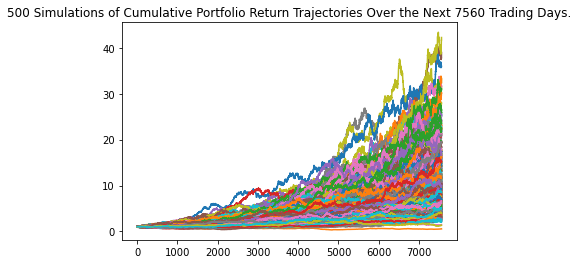

In [300]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

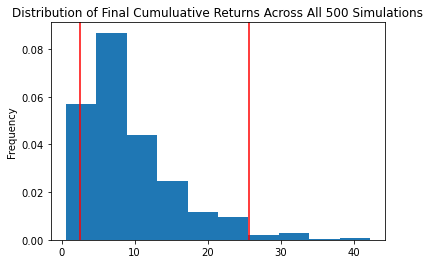

In [303]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [304]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_sum_stat = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_sum_stat)

count           500.000000
mean              9.438619
std               6.350518
min               0.565970
25%               4.904949
50%               7.556071
75%              11.845131
max              42.242082
95% CI Lower      2.569586
95% CI Upper     25.678740
Name: 7560, dtype: float64


In [306]:
#our confidence  level or the initial confidence or confidence interval
ci_lower = round(tbl_sum_stat[8]*20000,2)
ci_upper = round(tbl_sum_stat[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $51391.72 and $513574.8


In [307]:
#based on the 50% initial investment we ewould do a little math
ini_50=20000/2

In [308]:
ci_lower_50 = round(tbl_sum_stat[8]*ini_50,2)
ci_upper_50 = round(tbl_sum_stat[9]*ini_50,2)
# Print results
print(f"There is a 95% chance that an initial investment of 50% in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_50} and ${ci_upper_50}")

There is a 95% chance that an initial investment of 50% in the portfolio over the next 30 years will end within in the range of $25695.86 and $256787.4
